In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set numpy seed 
np.random.seed(2)

In [4]:
# First, generate our dataset
data = np.random.rand(100, 3)
df = pd.DataFrame(data, columns=["A", "B", "C"])
# Define our weights
weights = [1, -1, 1]
print(df.head())

          A         B         C
0  0.029149  0.372893  0.095873
1  0.196964  0.942421  0.371271
2  0.729001  0.126160  0.251283
3  0.881235  0.903296  0.287635
4  0.967113  0.668099  0.503007


In [5]:
# Generate a ranking of each variable (we want to maximize B and minimize A, C)
# For this, sort each column iteratively and then assign values
ranked_df = df.copy()
for i in range(len(ranked_df.columns)):
    col = ranked_df.columns[i]
    weight = weights[i]
    ranked_df = ranked_df.sort_values(by=[col])
    ranked_df[col] = weight * np.arange(1, len(ranked_df) + 1)
print(ranked_df.head())

     A   B  C
18  83 -96  1
54  70 -84  2
41  95 -59  3
36  61 -76  4
6   71 -54  5


Text(0, 0.5, 'Value Sum')

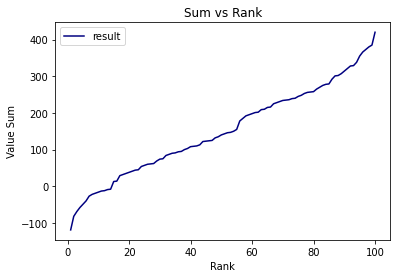

In [7]:
# Build the sum of each column and order
ranked_df["result"] = ranked_df.sum(axis=1)
ranked_df = ranked_df.sort_values(by=["result"])
ranked_df["rank"] = np.arange(1, len(ranked_df) + 1)
ax = ranked_df.plot("rank", "result", colormap='jet', title="Sum vs Rank")
ax.set_xlabel("Rank")
ax.set_ylabel("Value Sum")

In [8]:
optimal_index = ranked_df.iloc[0].name
print("The optimal combination is: " + str(df.loc[optimal_index].values))
# I tested it up to 20 000 000 values, for these, it ran in 30 Seconds.

The optimal combination is: [0.0639251  0.8125177  0.14018418]
